In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from collections import OrderedDict
import pylab
import seaborn as sns
import scipy.stats as stats
import math

import sympy as sp
sp.init_printing() 


In [2]:
#CONSTANTS
distance_between_axes = 4.6

#Calculated Distances:
#Straight:
x_st_calc = 4.1
y_st_calc = 40.5+4.6
angle_st_calc = 90

#LeftArc
x_lt_calc = -15.5
y_lt_calc = 26.6
angle_lt_calc = 173.6

#LeftArc
x_rt_calc = 23.9
y_rt_calc = 26.7
angle_rt_calc = 6.4

In [3]:
straight = pd.read_csv('data/Straight_updated.csv')
leftArc = pd.read_csv('data/LeftArc_updated.csv')
rightArc = pd.read_csv('data/RightArc_updated.csv')
initial = pd.read_csv('data/Start.csv')

In [4]:
straight.to_latex('output/straight')
leftArc.to_latex('output/leftArc')
rightArc.to_latex('output/rightArc')
initial.to_latex('output/initial')

In [5]:
print("Start Position: ")
display(initial)
print ("--------------------")
print ("")
print("Coordinates for Straight runs:")
display(straight)
print ("--------------------")
print ("")
print("Coordinates for Left Arc runs:")
display(leftArc)
print ("--------------------")
print ("")
print("Coordinates for Right Arc runs:")
display(rightArc)

Start Position: 


,X_L(cm),Y_L(cm),X_R(cm),Y_R(cm),Angle(degrees)
0,0,0,8.3,0,90


--------------------

Coordinates for Straight runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,1.2,39.7,9.3,39.6,89.3
1,3.0,39.9,11.2,39.5,87.3
2,2.6,39.9,10.8,39.5,88.3
3,2.2,39.8,10.4,39.5,88.3
4,1.4,39.8,9.6,39.7,89.3
5,0.5,39.9,8.1,39.8,90.3
6,-0.5,39.9,7.6,39.9,90.3
7,2.5,40.0,10.6,39.6,87.3
8,1.2,40.0,9.3,39.9,89.3
9,1.2,40.0,9.2,40.0,88.3


--------------------

Coordinates for Left Arc runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,-9.5,22.5,-9.1,30.8,165.1
1,-9.1,23.0,-8.5,31.1,162.1
2,-9.4,22.9,-8.9,31.1,165.1
3,-7.9,23.0,-7.1,31.4,161.1
4,-9.3,22.7,-8.8,30.8,164.1
5,-9.8,22.4,-9.5,30.5,168.1
6,-10.0,22.2,-9.6,30.3,164.1
7,-7.3,24.0,-6.3,31.9,162.1
8,-8.4,23.2,-8.4,31.1,165.1
9,-9.0,23.1,-8.1,31.2,166.1


--------------------

Coordinates for Right Arc runs:


,X_L (cm),Y_L (cm),X_R (cm),Y_R (cm),Theta (degrees)
0,18.8,30.0,16.3,21.8,16.3
1,17.5,31.0,15.3,22.9,17.3
2,17.8,30.4,15.7,22.3,17.3
3,18.3,30.3,16.1,22.0,17.3
4,16.6,31.5,14.6,23.5,18.3
5,15.4,31.3,13.8,23.5,22.3
6,17.7,30.8,15.5,22.8,23.3
7,18.2,30.5,16.0,22.3,17.3
8,19.3,29.9,16.9,21.6,16.3
9,18.0,30.8,15.8,22.6,17.3


In [27]:
"""st_ang_mean = straight[straight.columns[4]].mean()
leftArc_ang_mean = leftArc[leftArc.columns[4]].mean()
rightArc_ang_mean = rightArc[rightArc.columns[4]].mean()


st_ang_std = straight[straight.columns[4]].std()
leftArc_ang_std = leftArc[leftArc.columns[4]].std()
rightArc_ang_std= rightArc[rightArc.columns[4]].std()"""
print ("")

In [7]:
initial_left=np.array([initial[initial.columns[0]],initial[initial.columns[1]]]).T
initial_right=np.array([initial[initial.columns[2]],initial[initial.columns[3]]]).T

st_left=np.array([straight[straight.columns[0]],straight[straight.columns[1]]]).T
st_right=np.array([straight[straight.columns[2]],straight[straight.columns[3]]]).T

lftArc_left=np.array([leftArc[leftArc.columns[0]],leftArc[leftArc.columns[1]]]).T
lftArc_right=np.array([leftArc[leftArc.columns[2]],leftArc[leftArc.columns[3]]]).T

rtArc_left=np.array([rightArc[rightArc.columns[0]],rightArc[rightArc.columns[1]]]).T
rtArc_right=np.array([rightArc[rightArc.columns[2]],rightArc[rightArc.columns[3]]]).T

In [8]:
"""
Considering that the robot center is the center of the line
joining the two points
"""
init_centers_orig = np.array([(initial_left[:,0]+initial_right[:,0])/2,(initial_left[:,1]+initial_right[:,1])/2,
                         initial[initial.columns[4]]])
st_centers_orig = np.array([(st_left[:,0]+st_right[:,0])/2,(st_left[:,1]+st_right[:,1])/2,
                      straight[straight.columns[4]]])
rt_centers_orig = np.array([(rtArc_left[:,0]+rtArc_right[:,0])/2,(rtArc_left[:,1]+rtArc_right[:,1])/2,
                      rightArc[rightArc.columns[4]]])
lt_centers_orig = np.array([(lftArc_left[:,0]+lftArc_right[:,0])/2,(lftArc_left[:,1]+lftArc_right[:,1])/2,
                      leftArc[leftArc.columns[4]]])

In [9]:
def computeCenterOfMotion(data):
    com = np.zeros((data.shape[0],3))
    for i,row in enumerate(data[:]):
        x = row[0]+distance_between_axes*np.cos(np.deg2rad(row[2]))
        y = row[1]+distance_between_axes*np.sin(np.deg2rad(row[2]))
        com[i,:]=np.array([x,y,row[2]])        
    return com

In [10]:
init_centers=computeCenterOfMotion(init_centers_orig.T).T
st_centers=computeCenterOfMotion(st_centers_orig.T).T
lt_centers=computeCenterOfMotion(lt_centers_orig.T).T
rt_centers=computeCenterOfMotion(rt_centers_orig.T).T

In [11]:
"""
plt.plot((initial_left[:,0],initial_right[:,0]),(initial_left[:,1],initial_right[:,1]), 
         marker='*', color = 'g', label= "initial")
plt.plot((st_left[:,0],st_right[:,0]),(st_left[:,1],st_right[:,1]), 
         marker='o', color='y', label= "Straight")


# plt.plot((initial_left[:,0],initial_right[:,0]), (initial_left[:,1]+st_distance,initial_right[:,1]+st_distance), marker=',', color = 'k', label = "Calculated position for straight run" )

plt.plot((lftArc_left[:,0],lftArc_right[:,0]),(lftArc_left[:,1],lftArc_right[:,1]), 
         marker='x', color='r', label= "Left Arc")
plt.plot((rtArc_left[:,0],rtArc_right[:,0]),(rtArc_left[:,1],rtArc_right[:,1]), 
         marker='^', color='b', label= "Right Arc")
plt.plot()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Plot of the lines between two pens of robot in various runs")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.xlim(-25,35)
plt.ylim(-5,80)
plt.grid(True)
pylab.savefig('output/line_plot.png', bbox_inches='tight')
plt.show()
"""
print ()

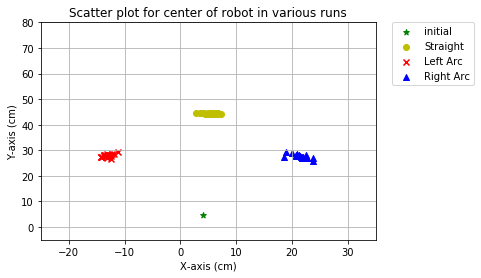

In [12]:
plt.scatter(init_centers[0,:],init_centers[1,:], marker='*', color = 'g', label= "initial")
plt.scatter(st_centers[0,:],st_centers[1,:], marker='o', color='y', label= "Straight")

"""
plt.scatter(init_centers[0,:],init_centers[1,:]+st_distance,
            marker=',', color = 'k', label = "Calculated position for straight run" )
"""

plt.scatter(lt_centers[0,:],lt_centers[1,:], marker='x', color='r', label= "Left Arc")
plt.scatter(rt_centers[0,:],rt_centers[1,:], marker='^', color='b', label= "Right Arc")

plt.plot()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Scatter plot for center of robot in various runs")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.xlim(-25,35)
plt.ylim(-5,80)
plt.grid(True)
pylab.savefig('output/scatter_plot.png', bbox_inches='tight')
plt.show()

In [13]:
#source: https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle

def plot_pose(point, angle, marker,color, length=0.2, label = ""):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = y+(length * math.sin(math.radians(angle)))
    endx = x+(length * math.cos(math.radians(angle)))
    
    plt.plot([x, endx], [y, endy],color = color,label='Pose in '+label)

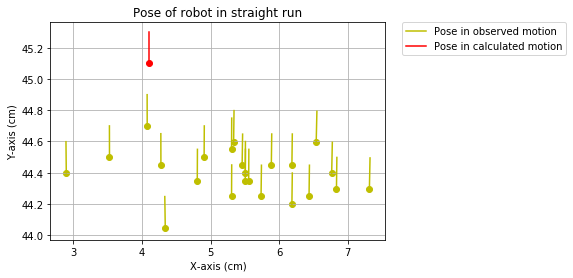

In [14]:
plt.scatter(st_centers[0,:],st_centers[1,:], marker='o', color='y')
for i in np.arange(st_centers.shape[1]):
    plot_pose(point=(st_centers[0,i],st_centers[1,i]), angle=st_centers[2,i],marker='o',color='y',
              label = 'observed motion')

plt.scatter(x_st_calc,y_st_calc, marker='o', color='r')
plot_pose(point=(x_st_calc,y_st_calc), angle=angle_st_calc,marker='o',color='r',label = 'calculated motion')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in straight run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_st.png', bbox_inches='tight')
plt.show()

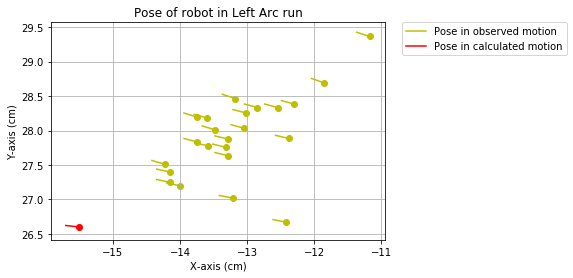

In [15]:
plt.scatter(lt_centers[0,:],lt_centers[1,:], marker='o', color='y')
for i in np.arange(lt_centers.shape[1]):
    plot_pose(point=(lt_centers[0,i],lt_centers[1,i]), angle=lt_centers[2,i],marker='o',color='y',
              label = 'observed motion')

plt.scatter(x_lt_calc,y_lt_calc, marker='o', color='r')
plot_pose(point=(x_lt_calc,y_lt_calc), angle=angle_lt_calc,marker='o',color='r',label = 'calculated motion')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in Left Arc run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_lt.png', bbox_inches='tight')
plt.show()

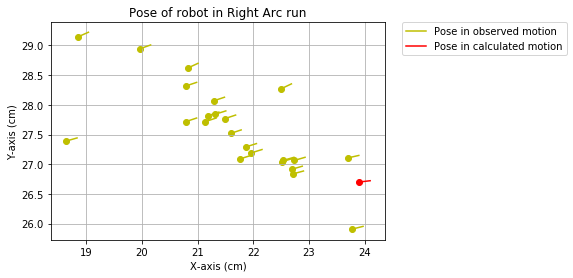

In [16]:
plt.scatter(rt_centers[0,:],rt_centers[1,:], marker='o', color='y')
for i in np.arange(rt_centers.shape[1]):
    plot_pose(point=(rt_centers[0,i],rt_centers[1,i]), angle=rt_centers[2,i],marker='o',color='y',
              label = 'observed motion')
    
plt.scatter(x_rt_calc,y_rt_calc, marker='o', color='r')
plot_pose(point=(x_rt_calc,y_rt_calc), angle=angle_rt_calc,marker='o',color='r',label = 'calculated motion')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Pose of robot in Right Arc run")
plt.xlabel("X-axis (cm)")
plt.ylabel("Y-axis (cm)")
plt.grid(True)
pylab.savefig('output/scatter_plot_rt.png', bbox_inches='tight')
plt.show()

In [17]:
#Calculate accuracy and precision
#-----
mean_straight = np.array(np.mean(st_centers,axis=1))[:,np.newaxis]
st_calc=np.array([[x_st_calc],[y_st_calc],[angle_st_calc]])
accuracy_straight = 100-np.abs(np.linalg.norm(st_calc)-np.linalg.norm(mean_straight)
                    )/(np.linalg.norm(st_calc))*100
stdDev_straight = np.std(st_centers,axis =1)

In [18]:
print (mean_straight)
print (stdDev_straight)
print (accuracy_straight)

[[ 5.42157162]
 [44.39390998]
 [89.        ]]
[1.06630132 0.14456213 1.21940827]
98.86255189759981


In [19]:
mean_lt = np.array(np.mean(lt_centers,axis=1))[:,np.newaxis]
lt_calc=np.array([[x_lt_calc],[y_lt_calc],[angle_lt_calc]])
stdDev_lt = np.std(lt_centers,axis =1)
accuracy_lt = 100-np.abs(np.linalg.norm(lt_calc)-np.linalg.norm(mean_lt)
                    )/(np.linalg.norm(lt_calc))*100

mean_rt = np.array(np.mean(rt_centers,axis=1))[:,np.newaxis]
rt_calc=np.array([[x_rt_calc],[y_rt_calc],[angle_rt_calc]])
stdDev_rt = np.std(rt_centers,axis =1)
accuracy_rt = 100-np.abs(np.linalg.norm(rt_calc)-np.linalg.norm(mean_rt)
                    )/(np.linalg.norm(rt_calc))*100


In [20]:
print (mean_lt)
print (stdDev_lt)
print (accuracy_lt)

[[-13.15329158]
 [ 27.91516284]
 [165.65217391]]
[0.75400892 0.57972044 2.18311098]
95.57209571137183


In [21]:
print (mean_rt)
print (stdDev_rt)
print (accuracy_rt)

[[21.59378388]
 [27.59321741]
 [17.        ]]
[1.26858915 0.72831213 2.79906817]
93.01354440858013


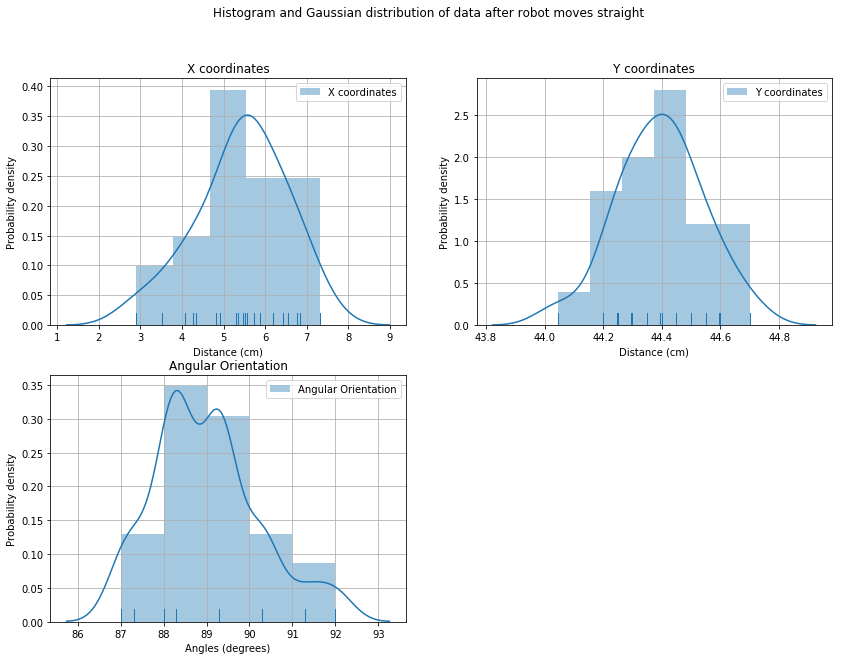

In [22]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
#ax.hist(st_centers[0,:], normed= True,label='Histogram of X coordinates')
sns.distplot(st_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(st_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(st_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)



plt.suptitle('Histogram and Gaussian distribution of data after robot moves straight')
pylab.savefig('output/histplot_st.png', bbox_inches='tight')
plt.show()



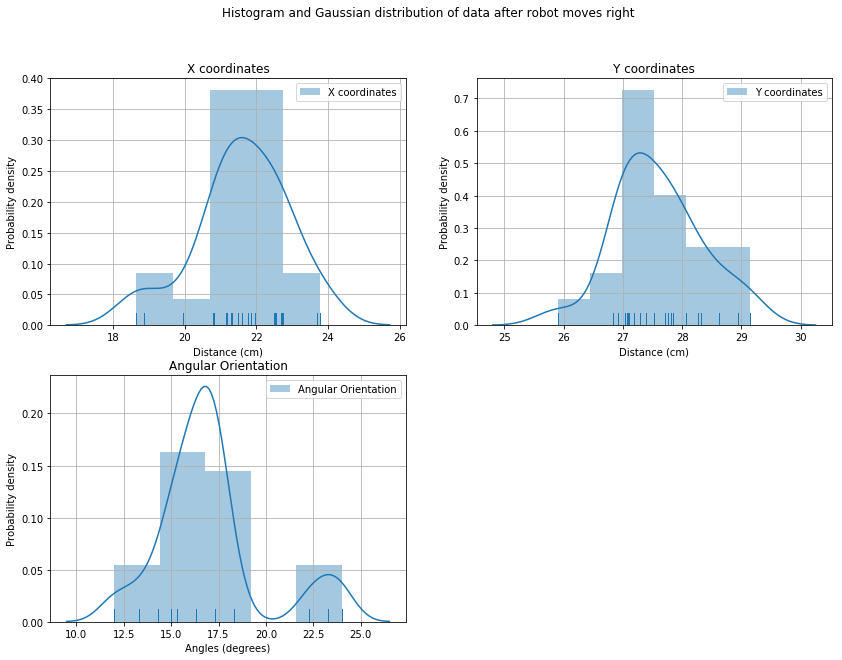

In [23]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
sns.distplot(rt_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
sns.distplot(rt_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.grid(True)
plt.legend()

ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(rt_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)

plt.suptitle('Histogram and Gaussian distribution of data after robot moves right')
pylab.savefig('output/histplot_rt.png', bbox_inches='tight')
plt.show()




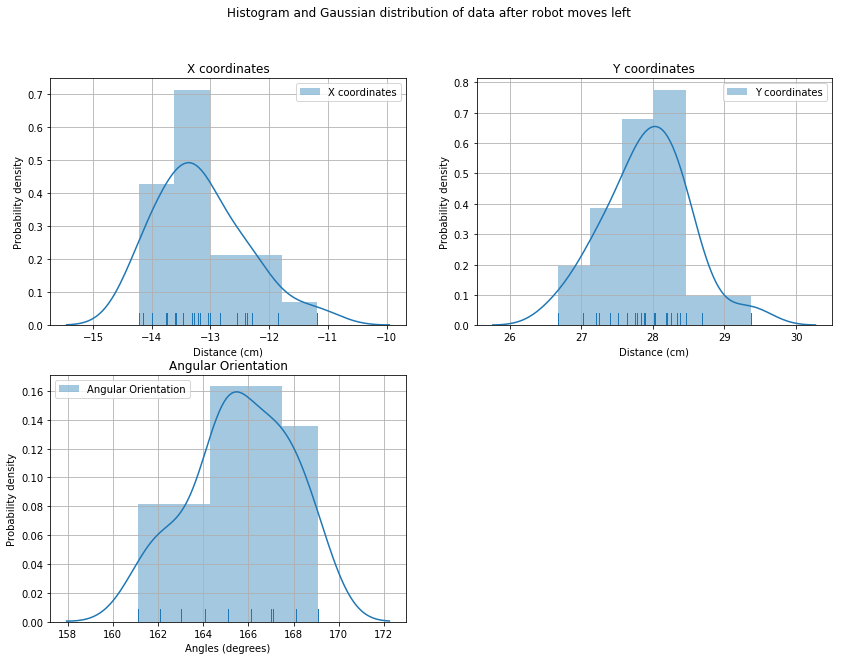

In [24]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(221)
sns.distplot(lt_centers[0,:],hist=True, rug=True,
             label='X coordinates')
plt.title('X coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)

ax = plt.subplot(222)
sns.distplot(lt_centers[1,:],hist=True, rug=True,
             label='Y coordinates')
plt.title('Y coordinates')
plt.ylabel('Probability density')
plt.xlabel('Distance (cm)')
plt.legend()
plt.grid(True)



ax = plt.subplot(223)
#ax.hist(st_centers[1,:], normed= True,label='Histogram of Y coordinates')
sns.distplot(lt_centers[2,:],hist=True, rug=True, bins= 5,
             label='Angular Orientation')
plt.title('Angular Orientation')
plt.ylabel('Probability density')
plt.xlabel('Angles (degrees)')
plt.legend()
plt.grid(True)

plt.suptitle('Histogram and Gaussian distribution of data after robot moves left')
pylab.savefig('output/histplot_lt.png', bbox_inches='tight')
plt.show()



In [25]:
#Prove that data observed is Gaussian

normtest_st_x=stats.normaltest(st_centers[0,:])
normtest_st_y=stats.normaltest(st_centers[1,:])
normtest_st_theta=stats.normaltest(st_centers[2,:])

normtest_rt_x=stats.normaltest(rt_centers[0,:])
normtest_rt_y=stats.normaltest(rt_centers[1,:])
normtest_rt_theta=stats.normaltest(rt_centers[2,:])

normtest_lt_x=stats.normaltest(lt_centers[0,:])
normtest_lt_y=stats.normaltest(lt_centers[1,:])
normtest_lt_theta=stats.normaltest(lt_centers[2,:])



print ("Straight\n X:(",normtest_st_x,"), \n Y:(",normtest_st_y,
       "), \n Theta:(",normtest_st_theta,")")
print ("")
print ("Left\n X:(",normtest_lt_x,"), \n Y:(",normtest_lt_y,")",
       "), \n Theta:(",normtest_lt_theta,")")
print ("")
print ("Right\n X:(",normtest_rt_x,"), \n Y:(",normtest_rt_y,")",
       "), \n Theta:(",normtest_rt_theta,")")


Straight
 X:( NormaltestResult(statistic=1.2638574820341648, pvalue=0.5315655593502602) ), 
 Y:( NormaltestResult(statistic=0.45581092048472854, pvalue=0.7961995287879245) ), 
 Theta:( NormaltestResult(statistic=2.168726781038359, pvalue=0.338116965860736) )

Left
 X:( NormaltestResult(statistic=3.3004361766916017, pvalue=0.1920080293407293) ), 
 Y:( NormaltestResult(statistic=0.9206957797013084, pvalue=0.6310640665306335) ) ), 
 Theta:( NormaltestResult(statistic=0.7675868696745632, pvalue=0.6812721397362909) )

Right
 X:( NormaltestResult(statistic=2.2102701498820885, pvalue=0.33116614697296387) ), 
 Y:( NormaltestResult(statistic=0.6404079395730669, pvalue=0.7260009397138145) ) ), 
 Theta:( NormaltestResult(statistic=7.40882033959042, pvalue=0.024614731598931353) )


In [26]:
assert (normtest_st_x.pvalue>0.05)
assert (normtest_st_y.pvalue>0.05)
assert (normtest_st_theta.pvalue>0.05)

assert (normtest_lt_x.pvalue>0.05)
assert (normtest_lt_y.pvalue>0.05)
assert (normtest_lt_theta.pvalue>0.05)

assert (normtest_rt_x.pvalue>0.05)
assert (normtest_rt_y.pvalue>0.05)
assert not(normtest_rt_theta.pvalue>0.05)